In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
# Used to set all the images in the Dataset to the same size. 

Image_Width=132
Image_Height=132
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [3]:
# Splitting the picture name, and assigning the value 1 
# if name is equal to dog, else assigning 0.

filenames =os.listdir("/content/drive/My Drive/School/dataset/train2/")

categories=[]
for name in filenames:
    category = name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)

# Creating a 2-Dimensional data structure, assigning 
# the filename array and the categories array.
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

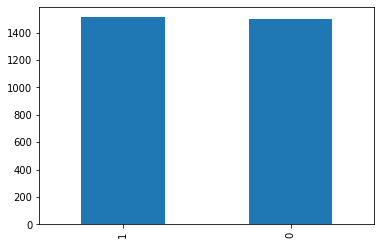

In [4]:
# PLotting the results graphically. 
df['category'].value_counts().plot.bar()

In [5]:
# Setting up the convolutional layer (receives the feature map), where the ReLu 
# activation function that returns 0 for every negative value in the input image.
# The Pooling layer provides spatial variance, where the system is capable of 
# recognizing an object as an object even when its appearance varies, the pooling
# performs a downsampling operation along the spatial dimension.

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [6]:
# Prints the summary of the convolutional model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 130, 130, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 130, 130, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 65, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0

In [7]:
# Setting the early stop, prevents over fitting. 
# Reducing the Learning rate.

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [8]:
# Preparing the data, since the class mode is set to 
# categorical the column category needs to be converted into string.

df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df, validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [9]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/drive/My Drive/School/dataset/train2",
                                                 x_col='filename',
                                                 y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/School/dataset/train2", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2409 validated image filenames belonging to 2 classes.
Found 603 validated image filenames belonging to 2 classes.


In [10]:
# Setting the epochs, the number of passes/iterations of the entire training dataset. 
epochs = 20
np.random.seed()
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/20
160/160 [==============================] - 1123s 7s/step - loss: 1.2012 - accuracy: 0.5455 - val_loss: 0.9815 - val_accuracy: 0.4767
Epoch 2/20
160/160 [==============================] - 138s 861ms/step - loss: 0.8346 - accuracy: 0.6040 - val_loss: 0.8525 - val_accuracy: 0.5283
Epoch 3/20
160/160 [==============================] - 138s 865ms/step - loss: 0.7457 - accuracy: 0.6082 - val_loss: 0.7543 - val_accuracy: 0.5683
Epoch 4/20
160/160 [==============================] - 138s 864ms/step - loss: 0.6707 - accuracy: 0.6487 - val_loss: 0.6805 - val_accuracy: 0.6267
Epoch 5/20
160/160 [==============================] - 138s 865ms/step - loss: 0.6213 - accuracy: 0.6809 - val_loss: 0.7242 - val_accuracy: 0.6133
Epoch 6/20
160/160 [==============================] - 138s 862ms/step - loss: 0.6036 - accuracy: 0.6809 - val_loss: 0.5606 - val_accuracy: 0.7183
Epoch 7/20
160/160 [==============================] - 137s 859ms/step - loss: 0.5964 - accuracy: 0.6921 - val_loss: 0.6797 - v

In [11]:
model.save("CatsvsDogs_model_20epoch.h5")

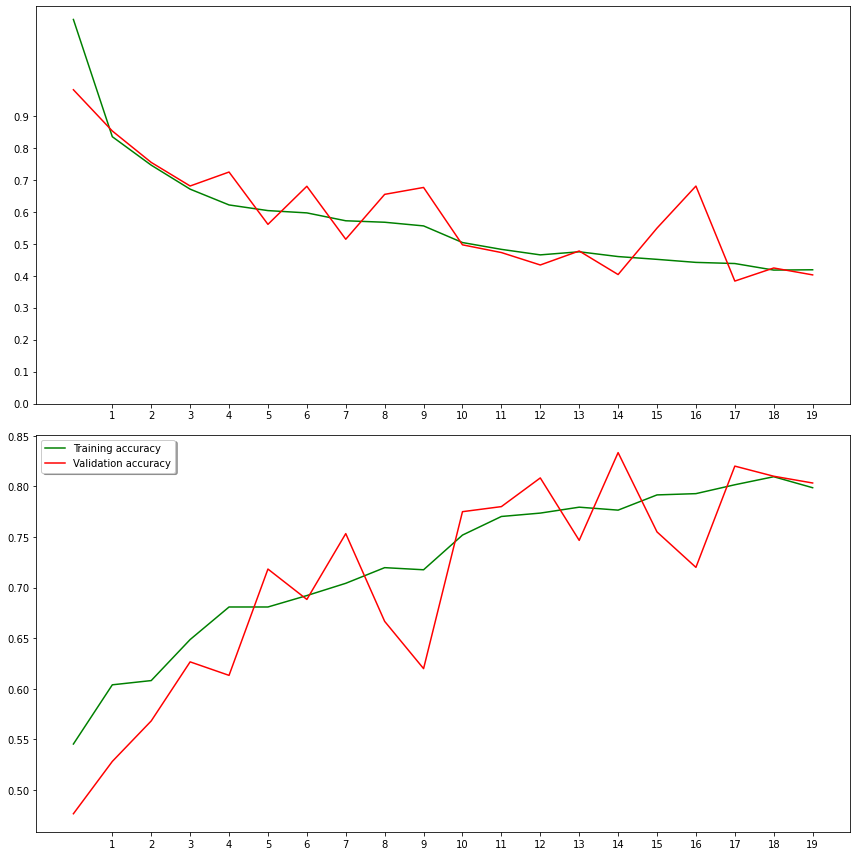

In [12]:
# Virtualizing the trainining and validation results 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='g', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='g', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [13]:
# Preparing the testing data

test_filenames = os.listdir("/content/drive/My Drive/School/dataset/test2")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255,)

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                 "/content/drive/My Drive/School/dataset/test2",
                                                 x_col='filename',
                                                 y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size,
                                                 shuffle=False
                                                  )

Found 1079 validated image filenames.


In [15]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [16]:
# Picking the category that has the highest probability with numpy avergae max.
# Converting the predict category back into our generator classes.

test_df['category'] = np.argmax(predict, axis= -1)

map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

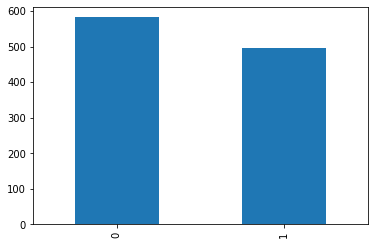

In [17]:
# Visualizing the result count
test_df['category'].value_counts().plot.bar()

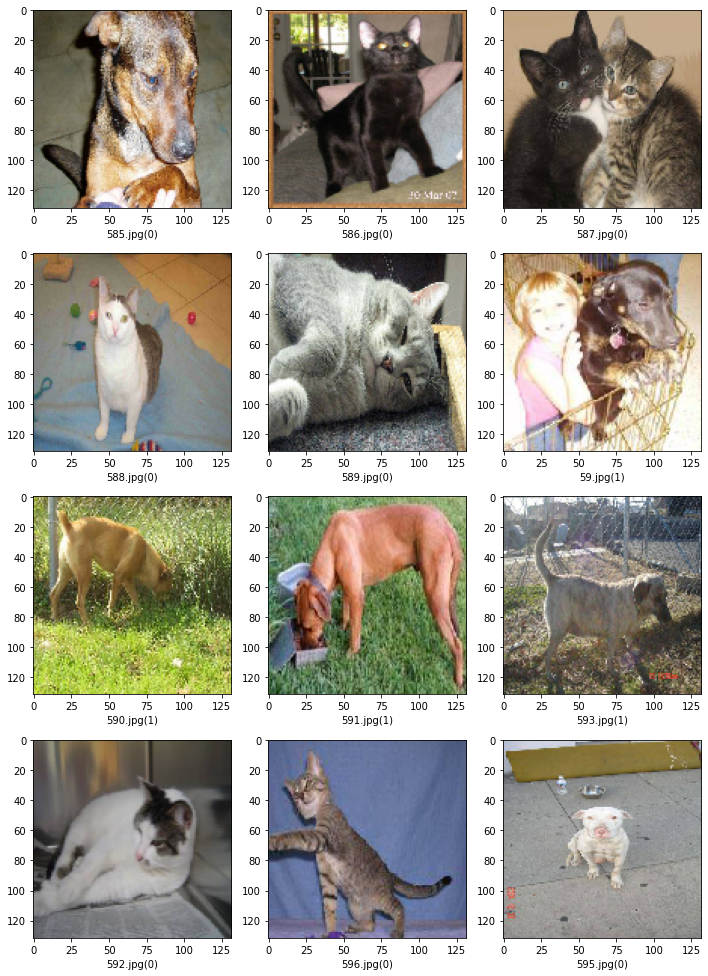

In [18]:
#  Displaying the predicted results, in regards to the accuracy 

test = test_df.head(12)
test.head()
plt.figure(figsize=(10, 20))
for index, row in test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/My Drive/School/dataset/test2/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()